## <b>Engenharia de Recursos</b>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats # para transformação "Curva em Sino"
from mlxtend.preprocessing import minmax_scaling # para escala min_max

kickstarters_2017 = pd.read_csv("/content/drive/MyDrive/datasets/ks-projects-201801.csv")

np.random.seed(0) # definir sementes para reprodutibilidade

In [9]:
kickstarters_2017.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [4]:
#@title Dimensionamento

original_data= pd.DataFrame(kickstarters_2017.usd_goal_real)

scaled_data= minmax_scaling(original_data, columns= ["usd_goal_real"])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [10]:
#@title Normalização

index_of_positive_pledges= kickstarters_2017.usd_pledged_real > 0 # Box-Cox aceita apenas valores positivos

positive_pledges= kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges] # Obtendo positive_pledges (usando seus índices)

normalized_pledges= pd.Series(stats.boxcox(positive_pledges)[0],
                              name= "usd_pledged_real", index= positive_pledges.index) # Normalizando positive_pledges

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


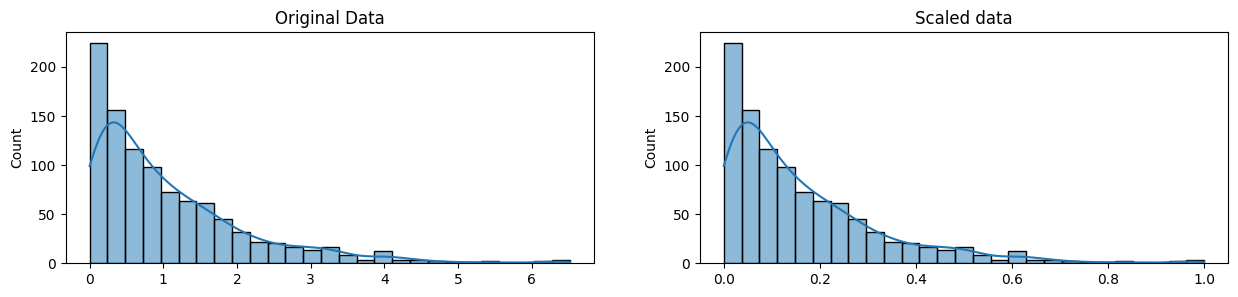

In [7]:
#@title Dimensionamento

# generate 1000 data points randomly drawn from an exponential distribution
original_teste = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_teste = minmax_scaling(original_teste, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_teste, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_teste, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

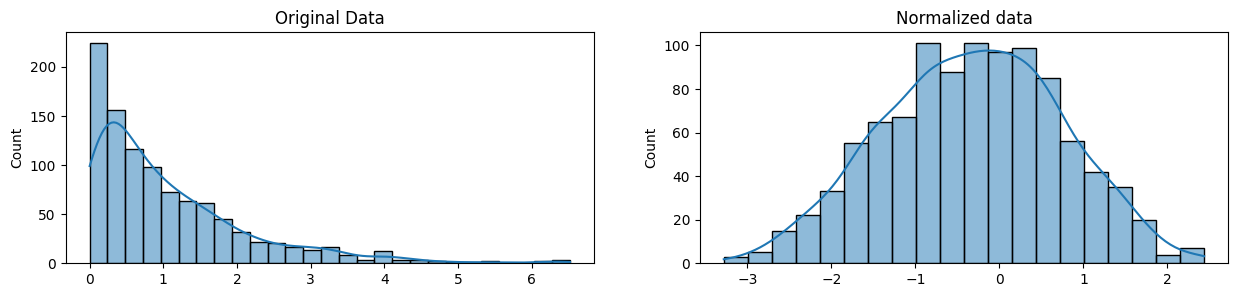

In [8]:
#@title Normalização

# normalize the exponential data with boxcox
normalized_teste = stats.boxcox(original_teste)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_teste, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_teste[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()